<a href="https://colab.research.google.com/github/AtharvanDogra/GPU_Hackathon_Arguably/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.6.0'

In [7]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  #  shear_range = 0.2,
                                  #  zoom_range = 0.2,
                                  #  horizontal_flip = True
                                   )


In [10]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/GPU_Hackathon/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set


Found 5875 images belonging to 2 classes.


In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/GPU_Hackathon/test_final/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 98 images belonging to 1 classes.


In [16]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [17]:
from tensorflow.keras.regularizers import l2

In [18]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [ ]:
## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [20]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, epochs = 15)

Epoch 1/15
184/184 [==============================] - 1825s 10s/step - loss: 0.4818 - accuracy: 0.7717
Epoch 2/15
184/184 [==============================] - 13s 72ms/step - loss: 0.2135 - accuracy: 0.9011
Epoch 3/15
184/184 [==============================] - 13s 71ms/step - loss: 0.1642 - accuracy: 0.9251
Epoch 4/15
184/184 [==============================] - 13s 70ms/step - loss: 0.1292 - accuracy: 0.9406
Epoch 5/15
184/184 [==============================] - 13s 71ms/step - loss: 0.1160 - accuracy: 0.9469
Epoch 6/15
184/184 [==============================] - 13s 71ms/step - loss: 0.0953 - accuracy: 0.9552
Epoch 7/15
184/184 [==============================] - 13s 71ms/step - loss: 0.0825 - accuracy: 0.9617
Epoch 8/15
184/184 [==============================] - 13s 70ms/step - loss: 0.0717 - accuracy: 0.9671
Epoch 9/15
184/184 [==============================] - 13s 70ms/step - loss: 0.0630 - accuracy: 0.9719
Epoch 10/15
184/184 [==============================] - 13s 71ms/step - loss: 0.05

KeyError: ignored

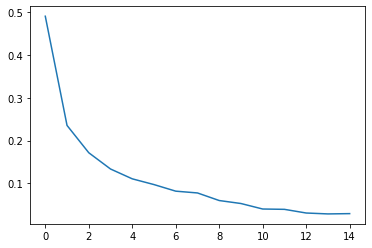

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('/content/drive/MyDrive/hindiObject_detection.h5')

In [23]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('/content/drive/MyDrive/hindiObject_detection.h5')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [50]:
# Part 4 - Making predictions

import numpy as np
import os 

from tensorflow.keras.preprocessing import image

# original = []       #storing original 0s and 1s
predict = []        #0s and 1s according to prediction
# zeros = []
for_json = {}

for image_name in os.listdir("/content/drive/MyDrive/GPU_Hackathon/test_final/test/"):

  # original.append(int(image_name.split("_")[1].split(".")[0]))                  #taking out 0s and 1s from combined test set
  
  test_image = image.load_img('/content/drive/MyDrive/GPU_Hackathon/test_final/test/'+ str(image_name), target_size = (64,64))
  test_image = image.img_to_array(test_image)
  test_image=test_image/255
  test_image = np.expand_dims(test_image, axis = 0)
  result = cnn.predict(test_image)

  if result < 0:
    predict.append(0)
    for_json[image_name] = 0

  elif result > 0:
    predict.append(1)
    for_json[image_name] = 1

  # else:
  #   zeros.append(0)
# result = cnn.predict(test_image)

In [51]:
# import numpy as np
# from tensorflow.keras.preprocessing import image
# test_image = image.load_img('/content/drive/MyDrive/GPU_Hackathon/test_final/test/1.jpg', target_size = (64,64))
# test_image = image.img_to_array(test_image)
# test_image=test_image/255
# test_image = np.expand_dims(test_image, axis = 0)
# result = cnn.predict(test_image)
# result
# predict
# original
for_json

{'1.jpg': 1,
 '10.jpg': 0,
 '11.jpg': 1,
 '12.jpg': 0,
 '13.jpg': 1,
 '14.jpg': 0,
 '15.jpg': 1,
 '16.jpg': 0,
 '17.jpg': 1,
 '18.jpg': 0,
 '19.jpg': 1,
 '2.jpg': 0,
 '20.jpg': 1,
 '21.jpg': 1,
 '22.jpg': 1,
 '23.jpg': 1,
 '24.jpg': 1,
 '25.jpg': 1,
 '26.jpg': 1,
 '27.jpg': 1,
 '28.jpg': 1,
 '29.jpg': 1,
 '3.jpg': 1,
 '30.jpg': 1,
 '31.jpg': 0,
 '32.jpg': 0,
 '33.jpg': 0,
 '34.jpg': 0,
 '35.jpg': 0,
 '36.jpg': 0,
 '37.jpg': 0,
 '38.jpg': 0,
 '39.jpg': 0,
 '4.jpg': 0,
 '40.jpg': 1,
 '41.jpg': 0,
 '42.jpg': 1,
 '43.jpg': 0,
 '44.jpg': 1,
 '45.jpg': 0,
 '46.jpg': 1,
 '47.jpg': 0,
 '48.jpg': 1,
 '49.jpg': 0,
 '5.jpg': 1,
 '50.jpg': 1,
 '51.jpg': 1,
 '52.jpg': 1,
 '53.jpg': 1,
 '54.jpg': 1,
 '55.jpg': 0,
 '56.jpg': 0,
 '57.jpg': 0,
 '58.jpg': 0,
 '59.jpg': 0,
 '6.jpg': 0,
 '60.jpg': 0,
 '61.jpg': 1,
 '62.jpg': 0,
 '63.jpg': 1,
 '64.jpg': 0,
 '65.jpg': 0,
 '66.jpg': 0,
 '67.jpg': 1,
 '68.jpg': 0,
 '69.jpg': 1,
 '7.jpg': 1,
 '70.jpg': 1,
 '71.jpg': 1,
 '72.jpg': 1,
 '73.jpg': 1,
 '74.jpg': 0,

In [60]:
import pandas as pd
a = pd.DataFrame.from_dict(for_json,orient='index')
a

,0
47.jpg,0
32.jpg,0
77.jpg,0
56.jpg,0
4.jpg,0
...,...
14.jpg,0
12.jpg,0
10.jpg,0
89.jpg,0


In [44]:
import json
with open('/content/drive/MyDrive/GPU_Hackathon/data2.json', 'w') as f:
  for_json = json.dumps(for_json)

In [45]:
for_json

'"{\\"47.jpg\\": 0, \\"32.jpg\\": 0, \\"77.jpg\\": 0, \\"56.jpg\\": 0, \\"4.jpg\\": 0, \\"79.jpg\\": 0, \\"41.jpg\\": 0, \\"97.jpg\\": 0, \\"49.jpg\\": 0, \\"95.jpg\\": 0, \\"88.jpg\\": 0, \\"59.jpg\\": 0, \\"74.jpg\\": 0, \\"65.jpg\\": 0, \\"66.jpg\\": 0, \\"75.jpg\\": 0, \\"2.jpg\\": 0, \\"17.jpg\\": 1, \\"19.jpg\\": 1, \\"62.jpg\\": 0, \\"3.jpg\\": 1, \\"71.jpg\\": 1, \\"70.jpg\\": 1, \\"55.jpg\\": 0, \\"30.jpg\\": 1, \\"20.jpg\\": 1, \\"15.jpg\\": 1, \\"63.jpg\\": 1, \\"83.jpg\\": 1, \\"24.jpg\\": 1, \\"82.jpg\\": 1, \\"25.jpg\\": 1, \\"1.jpg\\": 1, \\"61.jpg\\": 1, \\"26.jpg\\": 1, \\"22.jpg\\": 1, \\"51.jpg\\": 1, \\"52.jpg\\": 1, \\"21.jpg\\": 1, \\"92.jpg\\": 1, \\"84.jpg\\": 1, \\"28.jpg\\": 1, \\"53.jpg\\": 1, \\"54.jpg\\": 1, \\"27.jpg\\": 1, \\"13.jpg\\": 1, \\"9.jpg\\": 1, \\"46.jpg\\": 1, \\"94.jpg\\": 1, \\"11.jpg\\": 1, \\"73.jpg\\": 1, \\"93.jpg\\": 0, \\"48.jpg\\": 1, \\"44.jpg\\": 1, \\"40.jpg\\": 1, \\"69.jpg\\": 1, \\"81.jpg\\": 1, \\"5.jpg\\": 1, \\"91.jpg\\": 1, 

In [40]:
# import json
with open('/content/drive/MyDrive/GPU_Hackathon/data.json', 'w', encoding='utf-8') as f:
    json.dump(for_json, f, ensure_ascii=False, indent=4)

In [41]:
import json
with open('/content/drive/MyDrive/GPU_Hackathon/data1.json', 'w') as f:
    json.dump(for_json, f)

In [ ]:
for image_name in os.listdir("/content/drive/MyDrive/GPU_Hackathon/test/combined/"):
  # print(image_name)

In [ ]:
# result
len(predict)
# original


98

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Datasets/test/cats/cat.4017.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

In [ ]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

#Classification Report


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(original, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        51

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(original, predict)

1.0

In [ ]:
count=0
for i in range(len(predict)):
  if predict[i]==original[i]:
    count=count+1

accuracy=count/len(predict)
print(accuracy)

1.0


In [ ]:
import random
import json
from utils.io import write_json

def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)

def read_json(filename):
    with open(filename, 'r') as outfile:
        data =  json.load(outfile)
    return data

def generate_sample_file(filename):
    res = {}
    for i in range(1,100):
        test_set = str(i) + '.png'
        res[test_set] = 3

    write_json(filename, res)

if __name__ == '__main__':
    generate_sample_file('/content/drive/MyDrive/GPU_Hackathon/sample_result1.json')
